In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------Split Train and Test Data----------
from sklearn.model_selection import train_test_split

# -----Classification ML Algorithms--------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC 

from sklearn.neighbors import KNeighborsClassifier

# ----------HyperParameter Tuning --------------
from sklearn.model_selection import GridSearchCV

# ---------Evaluating Performance Metrics-------
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# ---------SMOTE for OvrSampling----------------
from imblearn.over_sampling import SMOTE

# --------Supress Future Warning----------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/AfterDataCleaning.csv')

In [3]:
df.head()

,year,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0
1,2015,100643,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0
2,2015,100756,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1
3,2015,101595,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0
4,2015,101653,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0


In [4]:
X = df.drop('churn',axis=1)
Y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1234)

print(f'Shape of X_train is- {X_train.shape}')
print(f'Shape of X_test is- {X_test.shape}')
print(f'Shape of y_train is- {y_train.shape}')
print(f'Shape of y_test is- {y_test.shape}')

Shape of X_train is- (1375, 14)
Shape of X_test is- (590, 14)
Shape of y_train is- (1375,)
Shape of y_test is- (590,)


In [5]:
sm = SMOTE(sampling_strategy=0.3, random_state=123)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel(),)

print(f'Revised Shape of X_train is- {X_train.shape}')
print(f'Revised Shape of y_train is- {y_train.shape}')

Revised Shape of X_train is- (1558, 14)
Revised Shape of y_train is- (1558,)


In [6]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, X_training_data, X_test_data, Y_training_data, Y_test_data, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_training_data)
    pred_test = model.predict(X_test_data)
    
    train_acc = accuracy_score(Y_training_data, pred_train)
    test_acc = accuracy_score(Y_test_data, pred_test)
    
    train_recall = recall_score(Y_training_data,pred_train)
    test_recall = recall_score(Y_test_data,pred_test)
    
    train_precision = precision_score(Y_training_data,pred_train)
    test_precision = precision_score(Y_test_data,pred_test)
    
    train_f1 = f1_score(Y_training_data,pred_train)
    test_f1 = f1_score(Y_test_data,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(Y_training_data,pred_train))
        print("Accuracy on test set : ",accuracy_score(Y_test_data,pred_test))
        print("Recall on training set : ",recall_score(Y_training_data,pred_train))
        print("Recall on test set : ",recall_score(Y_test_data,pred_test))
        print("Precision on training set : ",precision_score(Y_training_data,pred_train))
        print("Precision on test set : ",precision_score(Y_test_data,pred_test))
        print("F1-Score on training set : ",f1_score(Y_training_data,pred_train))
        print("F1-Score on test set : ",f1_score(Y_test_data,pred_test))
    
    return score_list # returning the list with train and test scores

In [7]:
def get_summary_of_models(models):
    # defining list of models

    # defining empty lists to add train and test results
    acc_train = []
    acc_test = []
    recall_train = []
    recall_test = []
    precision_train = []
    precision_test = []
    f1_train =[]
    f1_test = []
    roc_auc_train = []
    roc_auc_test = []
    
    # looping through all the models to get the accuracy, precall and precision scores
    for idx,model in enumerate(models):
            #print(model)
            j = get_metrics_score(model,X_train, X_test, y_train, y_test,False)
            acc_train.append(np.round(j[0],2))
            acc_test.append(np.round(j[1],2))
            recall_train.append(np.round(j[2],2))
            recall_test.append(np.round(j[3],2))
            precision_train.append(np.round(j[4],2))
            precision_test.append(np.round(j[5],2))
            f1_train.append(np.round(j[6],2))
            f1_test.append(np.round(j[7],2))
    
    model_metrics = pd.DataFrame({'TrainAccuracy': acc_train, 'TestAccuracy': acc_test, 'Train_Recall':recall_train, 
                                  'TestRecall':recall_test, 'TrainPrecision':precision_train, 'TestPrecision':precision_test, 
                                  'TrainF1Score':f1_train, 'TestF1Score':f1_test
                                 })
    
    return model_metrics

In [8]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_ROC_AUC_score(model, X_training_data, X_test_data, Y_training_data, Y_test_data, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train_prob = model.predict_proba(X_training_data)
    pred_train_prob = pred_train_prob[:,1]
    train_auc = roc_auc_score(Y_training_data, pred_train_prob)
    pred_test_prob = model.predict_proba(X_test_data)
    pred_test_prob = pred_test_prob[:,1]
    test_auc = roc_auc_score(Y_test_data,pred_test_prob)

    score_list.extend((train_auc,test_auc))
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:    
        print("ROC AUC Score on training set : ",roc_auc_score(Y_training_data,pred_train_prob))
        print("ROC AUC Score on test set : ",roc_auc_score(Y_test_data,pred_test_prob))
        
    return score_list

In [9]:
def get_ROC_AUC_score_of_models(models):
    # defining list of models

    roc_auc_train = []
    roc_auc_test = []
    
    # looping through all the models to get the accuracy, precall and precision scores
    for idx,model in enumerate(models):
            #print(model)
            j = get_ROC_AUC_score(model,X_train, X_test, y_train, y_test,False)
            roc_auc_train.append(np.round(j[0],2))
            roc_auc_test.append(np.round(j[1],2))
    
    model_auc_score = pd.DataFrame({'Train ROC-AUC Score': roc_auc_train, 'Test ROC-AUC Score': roc_auc_test})
    
    return model_auc_score

## 1. Logistic Regression

In [10]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_lr_train_predicted = lr_model.predict(X_train)
y_lr_test_predicted = lr_model.predict(X_test)
metrics.accuracy_score(y_train,y_lr_train_predicted)
#Using above defined function to get accuracy, recall and precision on train and test set
lr_score=get_metrics_score(lr_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.7753530166880617
Accuracy on test set :  0.8610169491525423
Recall on training set :  0.033426183844011144
Recall on test set :  0.046511627906976744
Precision on training set :  0.8
Precision on test set :  1.0
F1-Score on training set :  0.0641711229946524
F1-Score on test set :  0.08888888888888888


In [11]:
print('Classification Report for Training Data- \n',classification_report(y_train, y_lr_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_lr_test_predicted))
print('Confusion matrix for the train Data- \n',confusion_matrix(y_train, y_lr_train_predicted))
print('\nConfusion matrix for the test Data- \n',confusion_matrix(y_test, y_lr_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      1199
           1       0.80      0.03      0.06       359

    accuracy                           0.78      1558
   macro avg       0.79      0.52      0.47      1558
weighted avg       0.78      0.78      0.69      1558


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       504
           1       1.00      0.05      0.09        86

    accuracy                           0.86       590
   macro avg       0.93      0.52      0.51       590
weighted avg       0.88      0.86      0.80       590

Confusion matrix for the train Data- 
 [[1196    3]
 [ 347   12]]

Confusion matrix for the test Data- 
 [[504   0]
 [ 82   4]]


## 2. Linear Discriminant Analysis

In [12]:
lda_model = LinearDiscriminantAnalysis(n_components=1)
lda_model.fit(X_train,y_train)
y_lda_train_predicted = lda_model.predict(X_train)
y_lda_test_predicted = lda_model.predict(X_test)

#Using above defined function to get accuracy, recall and precision on train and test set
lda_score=get_metrics_score(lda_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.7926829268292683
Accuracy on test set :  0.8694915254237288
Recall on training set :  0.2841225626740947
Recall on test set :  0.313953488372093
Precision on training set :  0.6071428571428571
Precision on test set :  0.6
F1-Score on training set :  0.3870967741935483
F1-Score on test set :  0.41221374045801523


In [13]:
print('Classification Report for Training Data- \n',classification_report(y_train, y_lda_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_lda_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_lda_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_lda_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      1199
           1       0.61      0.28      0.39       359

    accuracy                           0.79      1558
   macro avg       0.71      0.61      0.63      1558
weighted avg       0.77      0.79      0.76      1558


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       504
           1       0.60      0.31      0.41        86

    accuracy                           0.87       590
   macro avg       0.75      0.64      0.67       590
weighted avg       0.85      0.87      0.85       590

Confusion matrix for the train data- 
 [[1133   66]
 [ 257  102]]

Confusion matrix for the test data- 
 [[486  18]
 [ 59  27]]


## 3 Gaussian Naive Bayes

In [14]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

# make predictions for train data
y_gnb_train_predicted = GNB_model.predict(X_train)
# make predictions for test data
y_gnb_test_predicted = GNB_model.predict(X_test)
#Using above defined function to get accuracy, recall and precision on train and test set
gnb_score=get_metrics_score(GNB_model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.7798459563543004
Accuracy on test set :  0.8627118644067797
Recall on training set :  0.18384401114206128
Recall on test set :  0.2558139534883721
Precision on training set :  0.5689655172413793
Precision on test set :  0.5641025641025641
F1-Score on training set :  0.27789473684210525
F1-Score on test set :  0.35200000000000004


In [15]:
# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_gnb_train_predicted))
print('\nClassification Report for Test Data- \n',classification_report(y_test, y_gnb_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gnb_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gnb_test_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1199
           1       0.57      0.18      0.28       359

    accuracy                           0.78      1558
   macro avg       0.68      0.57      0.57      1558
weighted avg       0.74      0.78      0.73      1558


Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       504
           1       0.56      0.26      0.35        86

    accuracy                           0.86       590
   macro avg       0.72      0.61      0.64       590
weighted avg       0.84      0.86      0.84       590

Confusion matrix for the train data- 
 [[1149   50]
 [ 293   66]]

Confusion matrix for the test data- 
 [[487  17]
 [ 64  22]]


## 4. Decision Tree Classifier

In [16]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_dt_train_predicted = dt_model.predict(X_train)
y_dt_test_predicted = dt_model.predict(X_test)
print('Decision Tree Score is ',dt_model.score(X_train, y_train))
dt_score=gnb_score=get_metrics_score(dt_model, X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_dt_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_dt_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_dt_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_dt_test_predicted))

Decision Tree Score is  1.0
Accuracy on training set :  1.0
Accuracy on test set :  0.8491525423728814
Recall on training set :  1.0
Recall on test set :  0.5
Precision on training set :  1.0
Precision on test set :  0.48314606741573035
F1-Score on training set :  1.0
F1-Score on test set :  0.4914285714285714
Classification report for the training data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1199
           1       1.00      1.00      1.00       359

    accuracy                           1.00      1558
   macro avg       1.00      1.00      1.00      1558
weighted avg       1.00      1.00      1.00      1558

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       504
           1       0.48      0.50      0.49        86

    accuracy                           0.85       590
   macro avg       0.70      0.70      0.70       590
w

## 5. GridSearch on Decision Tree Classifier

In [17]:
param_grid = {
        'max_depth' : [10,15,20,25,30], # maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12,15,30,35], # minimum sample number to split a node
        'min_samples_leaf' : [9,12,15,18,21,24],
        'criterion' :['gini', 'entropy']
    
}

dt_tuned = DecisionTreeClassifier()

gs_dt = GridSearchCV(estimator = dt_tuned, 
                      param_grid = param_grid, 
                      cv = 5,
                      verbose = True,
                      n_jobs= -1
                      )

gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [9, 12, 15, 18, 21, 24],
                         'min_samples_split': [3, 6, 9, 12, 15, 30, 35]},
             verbose=True)

In [18]:
print('Best Params are-', gs_dt.best_params_)
print('\n\nBest Score is-',gs_dt.best_score_)

# Set the clf to the best combination of parameters
gs_dt_tuned = gs_dt.best_estimator_

gs_dt_tuned.fit(X_train, y_train)

y_gs_dt_train_predicted = gs_dt_tuned.predict(X_train)

y_gs_dt_test_predicted = gs_dt_tuned.predict(X_test)

dt_score=get_metrics_score(gs_dt_tuned,X_train, X_test, y_train, y_test)

Best Params are- {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 12, 'min_samples_split': 35}


Best Score is- 0.8465969989281887
Accuracy on training set :  0.886392811296534
Accuracy on test set :  0.8813559322033898
Recall on training set :  0.6685236768802229
Recall on test set :  0.6162790697674418
Precision on training set :  0.8053691275167785
Precision on test set :  0.5888888888888889
F1-Score on training set :  0.7305936073059361
F1-Score on test set :  0.6022727272727273


Text(0.5, 0, 'Decision Tree Feature Importance')

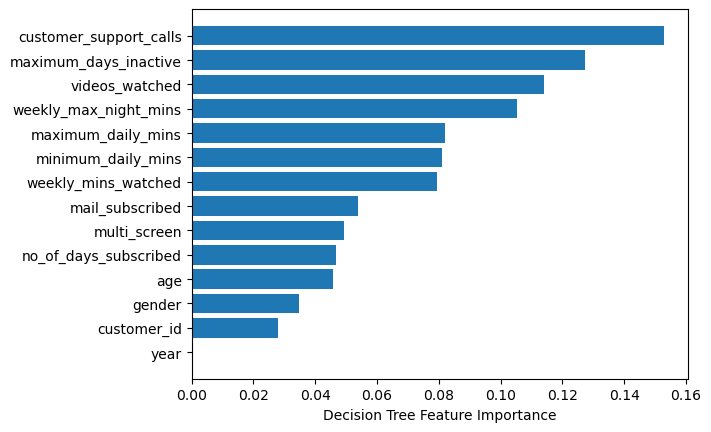

In [19]:
sorted_idx = gs_dt_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_dt_tuned.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

## 6. Random Forest Ensemble Technique

In [20]:
RF_model=RandomForestClassifier(max_depth=7,max_features=5,min_samples_leaf=10,min_samples_split=25,n_estimators=40,
                                random_state=1)
RF_model.fit(X_train, y_train)

y_rf_train_predicted = RF_model.predict(X_train)
y_rf_test_predicted = RF_model.predict(X_test)
rf_score=get_metrics_score(RF_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('\n\nClassification report for the training data \n',classification_report(y_train, y_rf_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_rf_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_rf_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_rf_test_predicted))

Accuracy on training set :  0.8947368421052632
Accuracy on test set :  0.9169491525423729
Recall on training set :  0.6128133704735376
Recall on test set :  0.5348837209302325
Precision on training set :  0.8979591836734694
Precision on test set :  0.8363636363636363
F1-Score on training set :  0.7284768211920529
F1-Score on test set :  0.652482269503546


Classification report for the training data 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1199
           1       0.90      0.61      0.73       359

    accuracy                           0.89      1558
   macro avg       0.90      0.80      0.83      1558
weighted avg       0.90      0.89      0.89      1558

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       504
           1       0.84      0.53      0.65        86

    accuracy                           0.92       590
   macro

## 7. RandomForest Tuned

In [21]:
param_grid = {
        #'max_depth': [5,7,9,11,13],
        'max_features': [3,5,7,9],
        'n_estimators': [25,30,35], # number of trees in the random forest
        'max_depth' : [5,7,10,15], # maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12], #,15,20,25,30, # minimum sample number to split a node
        'min_samples_leaf' : [10,12,15,18] # minimum sample number that can be stored in a leaf node
}

rf_tuned = RandomForestClassifier(random_state=123)

gs_rf = GridSearchCV(estimator = rf_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = True,
                      n_jobs= -1
                      )

gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15],
                         'max_features': [3, 5, 7, 9],
                         'min_samples_leaf': [10, 12, 15, 18],
                         'min_samples_split': [3, 6, 9, 12],
                         'n_estimators': [25, 30, 35]},
             verbose=True)

In [22]:
print('Best Params are-', gs_rf.best_params_)
print('\n\nBest Score is-',gs_rf.best_score_)

# Set the clf to the best combination of parameters
gs_rf_tuned = gs_rf.best_estimator_

gs_rf_tuned.fit(X_train, y_train)

y_gs_rf_train_predicted = gs_rf_tuned.predict(X_train)
y_gs_rf_test_predicted = gs_rf_tuned.predict(X_test)

# summarize the fit of the model
print('\nClassification report for the training data \n',classification_report(y_train, y_gs_rf_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_rf_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_rf_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_rf_test_predicted))

Best Params are- {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 25}


Best Score is- 0.8344190010374981

Classification report for the training data 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1199
           1       0.88      0.66      0.75       359

    accuracy                           0.90      1558
   macro avg       0.89      0.82      0.85      1558
weighted avg       0.90      0.90      0.90      1558

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       504
           1       0.84      0.65      0.73        86

    accuracy                           0.93       590
   macro avg       0.89      0.81      0.85       590
weighted avg       0.93      0.93      0.93       590

Confusion matrix for the train data- 
 [[1167   32]
 [ 122  237]]

Confusion matrix for the test da

Text(0.5, 0, 'Random Forest Feature Importance')

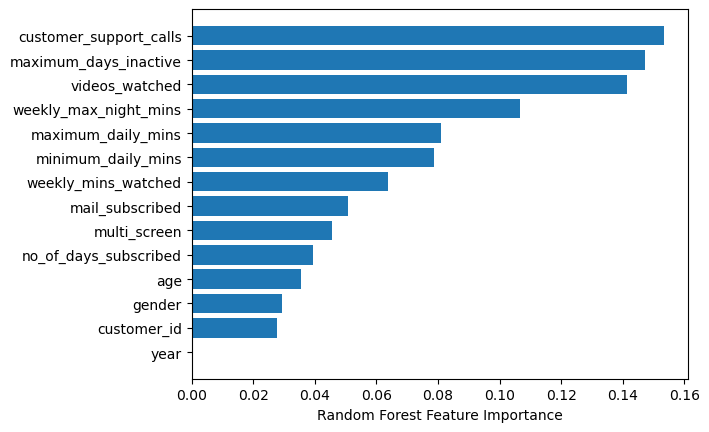

In [23]:
sorted_idx = gs_rf_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_rf_tuned.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## 8. Gradient Boosting

In [24]:
gbc_model = GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train,y_train)
# make predictions for train data
y_gbc_train_predicted = gbc_model.predict(X_train)

# make predictions for test data
y_gbc_test_predicted = gbc_model.predict(X_test)
gbc_score=get_metrics_score(gbc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_gbc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_gbc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_gbc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_gbc_test_predicted))

Accuracy on training set :  0.9358151476251605
Accuracy on test set :  0.9050847457627119
Recall on training set :  0.7493036211699164
Recall on test set :  0.5232558139534884
Precision on training set :  0.96415770609319
Precision on test set :  0.75
F1-Score on training set :  0.8432601880877743
F1-Score on test set :  0.6164383561643836
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1199
           1       0.96      0.75      0.84       359

    accuracy                           0.94      1558
   macro avg       0.95      0.87      0.90      1558
weighted avg       0.94      0.94      0.93      1558

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       504
           1       0.75      0.52      0.62        86

    accuracy                           0.91       590
   macro avg       0.84      0.

## 9. Gradient Boosting Tuned

In [25]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from article
param_grid = {
    "n_estimators": [20,30,40],
    "subsample":[0.9],
    "max_features":[0.8],
    "learning_rate": [0.1],
    'max_depth' : [1,2,3,4,5,10,15,20], # maximum number of levels allowed in each decision tree
    'min_samples_split' : [30,35,40,45], # minimum sample number to split a node
    'min_samples_leaf' : [3,6,9,12,15]
}


gs_gbc = GridSearchCV(estimator = gbc_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = 1,
                      return_train_score = True,
                      n_jobs= -1
                      )

gs_gbc.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
                         'max_features': [0.8],
                         'min_samples_leaf': [3, 6, 9, 12, 15],
                         'min_samples_split': [30, 35, 40, 45],
                         'n_estimators': [20, 30, 40], 'subsample': [0.9]},
             return_train_score=True, verbose=1)

In [26]:
print('Best Params are-', gs_gbc.best_params_)
print('\n\nBest Score is-',gs_gbc.best_score_)

# Set the clf to the best combination of parameters
gs_gbc_tuned = gs_gbc.best_estimator_
gs_gbc_tuned.fit(X_train, y_train)

y_gs_gbc_train_predicted = gs_gbc_tuned.predict(X_train)
y_gs_gbc_test_predicted = gs_gbc_tuned.predict(X_test)

# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train, y_gs_gbc_train_predicted))
print('Classification report for the test data \n',classification_report(y_test, y_gs_gbc_test_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train, y_gs_gbc_train_predicted))
print('\nConfusion matrix for the test data- \n',confusion_matrix(y_test, y_gs_gbc_test_predicted))

Best Params are- {'learning_rate': 0.1, 'max_depth': 20, 'max_features': 0.8, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 40, 'subsample': 0.9}


Best Score is- 0.8831838841954448
Classification report for the training data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1199
           1       1.00      1.00      1.00       359

    accuracy                           1.00      1558
   macro avg       1.00      1.00      1.00      1558
weighted avg       1.00      1.00      1.00      1558

Classification report for the test data 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       504
           1       0.84      0.57      0.68        86

    accuracy                           0.92       590
   macro avg       0.89      0.78      0.82       590
weighted avg       0.92      0.92      0.92       590

Confusion matrix for the train data- 
 [[1199    0]
 [   0

Text(0.5, 0, 'Gradient Boosting Feature Importance')

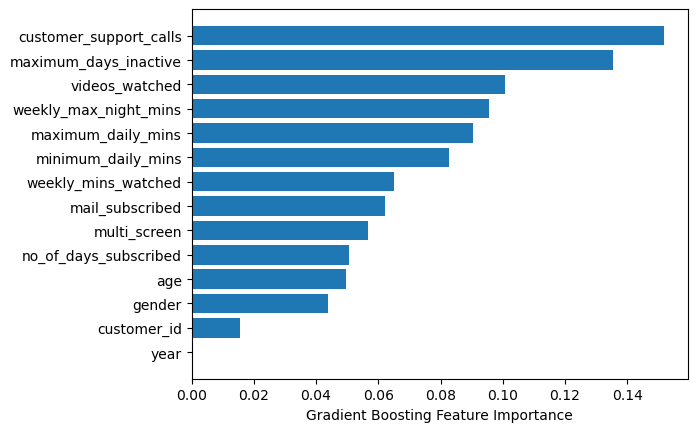

In [27]:
sorted_idx = gs_gbc_tuned.feature_importances_.argsort()
plt.barh(X_train.columns,gs_gbc_tuned.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

## 10. Bagging Classifier

In [28]:
bc_model = BaggingClassifier(random_state=1)
bc_model.fit(X_train,y_train)
# make predictions for train data
y_bc_train_predicted = bc_model.predict(X_train)

# make predictions for test data
y_bc_test_predicted = bc_model.predict(X_test)
bc_score=get_metrics_score(bc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_bc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_bc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_bc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_bc_test_predicted))

Accuracy on training set :  0.9858793324775353
Accuracy on test set :  0.911864406779661
Recall on training set :  0.9415041782729805
Recall on test set :  0.5116279069767442
Precision on training set :  0.9970501474926253
Precision on test set :  0.8148148148148148
F1-Score on training set :  0.9684813753581661
F1-Score on test set :  0.6285714285714286
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1199
           1       1.00      0.94      0.97       359

    accuracy                           0.99      1558
   macro avg       0.99      0.97      0.98      1558
weighted avg       0.99      0.99      0.99      1558

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       504
           1       0.81      0.51      0.63        86

    accuracy                           0.91       590
   macro avg    

## 11. Ada Boosting Classifier

In [29]:
abc_model = AdaBoostClassifier(random_state=1)
abc_model.fit(X_train,y_train)
# make predictions for train data
y_abc_train_predicted = abc_model.predict(X_train)

# make predictions for test data
y_abc_test_predicted = abc_model.predict(X_test)
abc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_abc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_abc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_abc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_abc_test_predicted))

Accuracy on training set :  0.8645699614890886
Accuracy on test set :  0.8627118644067797
Recall on training set :  0.5431754874651811
Recall on test set :  0.37209302325581395
Precision on training set :  0.8057851239669421
Precision on test set :  0.5423728813559322
F1-Score on training set :  0.64891846921797
F1-Score on test set :  0.4413793103448276
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1199
           1       0.81      0.54      0.65       359

    accuracy                           0.86      1558
   macro avg       0.84      0.75      0.78      1558
weighted avg       0.86      0.86      0.85      1558

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       504
           1       0.54      0.37      0.44        86

    accuracy                           0.86       590
   macro avg    

## 12 Voting Classifier

In [30]:
# defining list of models
estimator= [('LR',lr_model), ('LDA',lda_model), ('GNB',GNB_model), ('DT',dt_model), ('GSDT',gs_dt_tuned), ('RF',RF_model),
            ('GSRF',gs_rf_tuned), ('GBC',gbc_model), ('GSGBC',gs_gbc_tuned), ('BC', bc_model),('ABC',abc_model)]

In [31]:
soft_vc_model = VotingClassifier(estimators= estimator, voting='soft')
soft_vc_model.fit(X_train,y_train)

# make predictions for train data
y_soft_vc_train_predicted = soft_vc_model.predict(X_train)

# make predictions for test data
y_soft_vc_test_predicted = soft_vc_model.predict(X_test)
soft_vc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_soft_vc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_soft_vc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_soft_vc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_soft_vc_test_predicted))

Accuracy on training set :  0.8645699614890886
Accuracy on test set :  0.8627118644067797
Recall on training set :  0.5431754874651811
Recall on test set :  0.37209302325581395
Precision on training set :  0.8057851239669421
Precision on test set :  0.5423728813559322
F1-Score on training set :  0.64891846921797
F1-Score on test set :  0.4413793103448276
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1199
           1       1.00      0.78      0.87       359

    accuracy                           0.95      1558
   macro avg       0.97      0.89      0.92      1558
weighted avg       0.95      0.95      0.95      1558

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       504
           1       0.90      0.52      0.66        86

    accuracy                           0.92       590
   macro avg    

In [32]:
hard_vc_model = VotingClassifier(estimators= estimator, voting='hard')
hard_vc_model.fit(X_train,y_train)

# make predictions for train data
y_hard_vc_train_predicted = hard_vc_model.predict(X_train)

# make predictions for test data
y_hard_vc_test_predicted = hard_vc_model.predict(X_test)
hard_vc_score=get_metrics_score(abc_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_hard_vc_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_hard_vc_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_hard_vc_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_hard_vc_test_predicted))

Accuracy on training set :  0.8645699614890886
Accuracy on test set :  0.8627118644067797
Recall on training set :  0.5431754874651811
Recall on test set :  0.37209302325581395
Precision on training set :  0.8057851239669421
Precision on test set :  0.5423728813559322
F1-Score on training set :  0.64891846921797
F1-Score on test set :  0.4413793103448276
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1199
           1       0.97      0.69      0.81       359

    accuracy                           0.92      1558
   macro avg       0.94      0.84      0.88      1558
weighted avg       0.93      0.92      0.92      1558

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       504
           1       0.85      0.52      0.65        86

    accuracy                           0.92       590
   macro avg    

<Figure size 1200x600 with 0 Axes>

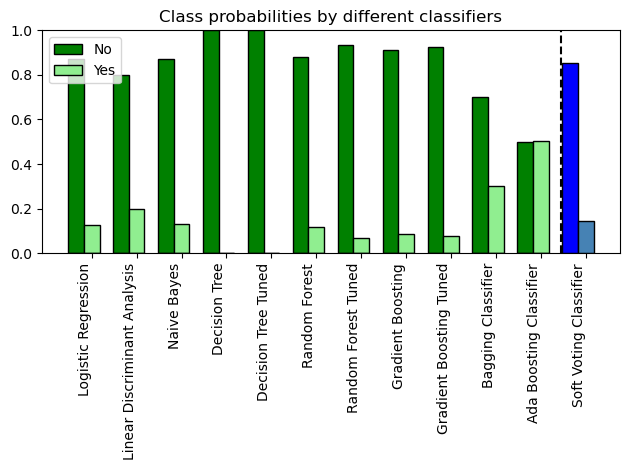

In [33]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
          abc_model, soft_vc_model]

probability_list = [c.fit(X_train, y_train).predict_proba(X) for c in models_list]

class1_1 = [pr[0, 0] for pr in probability_list]
class2_1 = [pr[0, 1] for pr in probability_list]

# plotting

N = 12  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

plt.figure(figsize=(12,6))
fig, ax = plt.subplots()

# bars for classifier 1-11
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(10.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
     'Random Forest','Random Forest Tuned', 'Gradient Boosting','Gradient Boosting Tuned',
     'Bagging Classifier','Ada Boosting Classifier','Soft Voting Classifier'],
    rotation=90,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities by different classifiers")
plt.legend([p1[0], p2[0]], ["No", "Yes"], loc="upper left")
plt.tight_layout()
plt.show()

In [34]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
          abc_model, soft_vc_model, hard_vc_model]

index_list = ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
              'Random Forest','Random Forest Tuned', 'Gradient Boosting Classifier','Gradient Boosting Classifier Tuned',
              'Bagging Classifier','Ada Boosting Classifier','Soft Voting Classifier', 'Hard Voting Classifier']

all_model_comparison = get_summary_of_models(models_list)

all_model_comparison = all_model_comparison.set_index(pd.Index(index_list))

all_model_comparison

,TrainAccuracy,TestAccuracy,Train_Recall,TestRecall,TrainPrecision,TestPrecision,TrainF1Score,TestF1Score
Logistic Regression,0.78,0.86,0.03,0.05,0.80,1.00,0.06,0.09
Linear Discriminant Analysis,0.79,0.87,0.28,0.31,0.61,0.60,0.39,0.41
Naive Bayes,0.78,0.86,0.18,0.26,0.57,0.56,0.28,0.35
Decision Tree,1.00,0.86,1.00,0.57,1.00,0.52,1.00,0.54
Decision Tree Tuned,0.89,0.88,0.67,0.62,0.81,0.59,0.73,0.60
Random Forest,0.89,0.92,0.61,0.53,0.90,0.84,0.73,0.65
Random Forest Tuned,0.90,0.93,0.66,0.65,0.88,0.84,0.75,0.73
Gradient Boosting Classifier,0.94,0.91,0.75,0.52,0.96,0.75,0.84,0.62
Gradient Boosting Classifier Tuned,1.00,0.92,1.00,0.57,1.00,0.84,1.00,0.68
Bagging Classifier,0.99,0.91,0.94,0.51,1.00,0.81,0.97,0.63


In [35]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
              abc_model]

index_list = ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
              'Random Forest','Random Forest Tuned', 'Gradient Boosting Classifier','Gradient Boosting Classifier Tuned',
              'Bagging Classifier','Ada Boosting Classifier']

model_auc_score = get_ROC_AUC_score_of_models(models_list)

model_auc_score = model_auc_score.set_index(pd.Index(index_list))

model_auc_score

,Train ROC-AUC Score,Test ROC-AUC Score
Logistic Regression,0.65,0.60
Linear Discriminant Analysis,0.79,0.77
Naive Bayes,0.68,0.62
Decision Tree,1.00,0.74
Decision Tree Tuned,0.94,0.82
Random Forest,0.93,0.88
Random Forest Tuned,0.96,0.88
Gradient Boosting Classifier,0.97,0.88
Gradient Boosting Classifier Tuned,1.00,0.89
Bagging Classifier,1.00,0.87


# 13. StackingCVClassifier

In [45]:
from mlxtend.classifier import StackingCVClassifier

stack_clf_model = StackingCVClassifier(classifiers= models_list,
                                       shuffle = False,
                                       use_probas = True,
                                       cv = 5,
                                       meta_classifier = gs_rf_tuned
                                      )
stack_clf_model.fit(X_train,y_train)

# make predictions for train data
y_stack_clf_train_predicted = stack_clf_model.predict(X_train)

# make predictions for test data
y_stack_clf_test_predicted = stack_clf_model.predict(X_test)
stack_clf_score=get_metrics_score(stack_clf_model,X_train, X_test, y_train, y_test)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train, y_stack_clf_train_predicted))
print('Classification Report for Test Data- \n',classification_report(y_test, y_stack_clf_test_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train, y_stack_clf_train_predicted))
print('\nConfusion Matrix for Test Data - \n',confusion_matrix(y_test, y_stack_clf_test_predicted))

Accuracy on training set :  0.9955070603337612
Accuracy on test set :  0.9203389830508475
Recall on training set :  1.0
Recall on test set :  0.6162790697674418
Precision on training set :  0.9808743169398907
Precision on test set :  0.7910447761194029
F1-Score on training set :  0.9903448275862068
F1-Score on test set :  0.6928104575163397
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1199
           1       0.98      1.00      0.99       359

    accuracy                           1.00      1558
   macro avg       0.99      1.00      0.99      1558
weighted avg       1.00      1.00      1.00      1558

Classification Report for Test Data- 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       504
           1       0.79      0.62      0.69        86

    accuracy                           0.92       590
   macro avg       0.86      0

## Random Forest Tuned seems to be the best performing model in all parameters.